<a href="https://colab.research.google.com/github/spreadzp/ml-price-predictor/blob/master/Copy_of_kaggle_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Соревнования по распознаванию рукописных цифр на Kaggle

Пример кода для отправки решения в соревнование Kaggle - https://www.kaggle.com/c/digit-recognizer

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from sklearn.model_selection import train_test_split
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Настраиваем Kaggle API

Загружаем токен аутентификации

In [2]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!ls

kaggle.json  sample_data


Копируем токен в каталог .kaggle

In [0]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle

## Загружаем данные с сайта Kaggle

In [7]:
!kaggle competitions download -c digit-recognizer

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!ls

sample_data  sample_submission.csv  test.csv.zip  train.csv.zip


## Проверяем формат данных

In [10]:
!unzip train.csv.zip
!ls

Archive:  train.csv.zip
  inflating: train.csv               
sample_data  sample_submission.csv  test.csv.zip  train.csv  train.csv.zip


Данные для обучения

In [11]:
!head train.csv

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel1

Данные для тестирования

In [13]:
!unzip test.csv
!ls
!head test.csv

Archive:  test.csv.zip
  inflating: test.csv                
sample_data	       test.csv      train.csv
sample_submission.csv  test.csv.zip  train.csv.zip
pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,p

Пример файла с решением

In [14]:
!head sample_submission.csv

ImageId,Label
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Подготовка данных для обучения сети

Загружаем данные для обучения из файла

In [0]:
train_dataset = np.loadtxt('train.csv', skiprows=1, delimiter=',')

In [16]:
train_dataset[0:5]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Выделяем данные для обучения

In [0]:
x_train = train_dataset[:, 1:]
# Переформатируем данные в 2D, бэкенд TensorFlow
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

Нормализуем данные для обучения

In [0]:
x_train /= 255.0

In [19]:
x_train[1].shape

(28, 28, 1)

Выделяем правильные ответы

In [0]:
y_train = train_dataset[:, 0]

In [21]:
y_train[:5]

array([1., 0., 1., 4., 0.])

Преобразуем ответы в формат one hot encoding

In [0]:
y_train = utils.to_categorical(y_train)

In [23]:
y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Разделяем набор данных на две части: для обучения (X_Train, Y_train) и проверки (X_val, Y_val)

In [0]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

In [25]:
X_train.shape

(37800, 28, 28, 1)

Создаем генератор для расширения данных

In [0]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

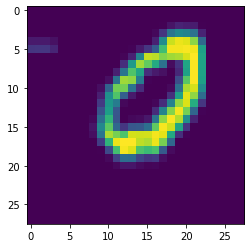

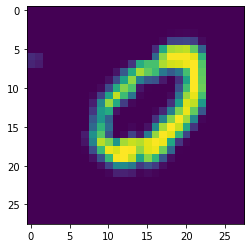

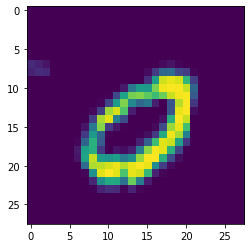

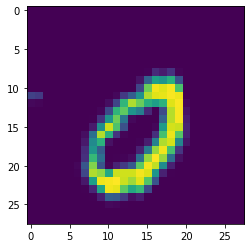

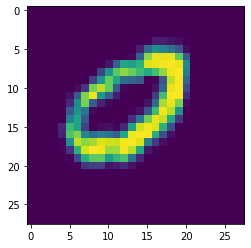

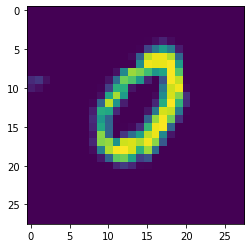

In [29]:
i = 0
data = X_train[8]
data = np.expand_dims(data, axis=0)
for batch in datagen.flow(data, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0][:,:,0])
    i += 1
    if i % 6 == 0:
        break
plt.show()

## Создаем нейронную сеть

**Создаем последовательную модель**

In [30]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


**Компилируем сеть**

In [31]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

## Обучаем нейронную сеть

In [0]:
сheckpoint = ModelCheckpoint('mnist-cnn.hdf5', 
                              monitor='val_acc', 
                              save_best_only=True,
                              verbose=1)

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
batch_size=96

In [51]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size), 
                    epochs=30,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    verbose=1,
                    callbacks=[сheckpoint, learning_rate_reduction])

Epoch 1/30
4200/393 [================================================================================================================================================================================================================================================================================================================================] - 0s 55us/sample - loss: 0.0069 - acc: 0.9957

Epoch 00001: val_acc improved from -inf to 0.99571, saving model to mnist-cnn.hdf5
393/393 [==============================] - 10s 25ms/step - loss: 0.0173 - acc: 0.9951 - val_loss: 0.0131 - val_acc: 0.9957
Epoch 2/30
4200/393 [================================================================================================================================================================================================================================================================================================================================] - 0s 55us/sample - loss: 0.0070 - acc: 0.9960

Epoch 00002: v

In [0]:
model.load_weights('mnist-cnn.hdf5')

## Визуализация качества обучения


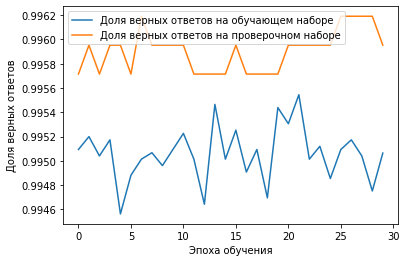

In [53]:
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем данные для распознавания

In [0]:
test_dataset = np.loadtxt('test.csv', skiprows=1, delimiter=",")

In [55]:
test_dataset[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
x_test = test_dataset.reshape(test_dataset.shape[0], 28, 28, 1)

Нормализация данных

In [0]:
x_test = x_test / 255.0

## Запускаем распознавание рукописных цифр из тестового набора данных

In [0]:
predictions = model.predict(x_test)

In [59]:
predictions[:5]

array([[6.18896958e-16, 1.48044323e-15, 1.00000000e+00, 2.55690759e-12,
        2.39662179e-14, 2.87419786e-17, 1.20260917e-16, 4.81499281e-13,
        1.53511406e-14, 1.35324504e-15],
       [1.00000000e+00, 2.52277339e-13, 1.46449214e-10, 1.09170841e-11,
        6.01185421e-12, 2.12392950e-10, 1.07967271e-08, 3.01578727e-11,
        1.84621118e-09, 6.52179644e-09],
       [1.10759485e-10, 1.32660896e-10, 1.00457609e-09, 2.55373278e-10,
        7.12851352e-06, 7.98186875e-13, 1.14993176e-14, 7.82993936e-08,
        2.10086100e-07, 9.99992609e-01],
       [9.99416351e-01, 9.21362275e-09, 4.22112464e-07, 6.85452278e-07,
        5.63576634e-08, 6.28408031e-07, 3.90665518e-05, 2.53173454e-07,
        5.49947890e-06, 5.37090586e-04],
       [5.71232032e-16, 3.39859195e-12, 9.72031455e-10, 9.99999642e-01,
        1.17535483e-17, 7.71427089e-10, 1.02148955e-13, 1.37451259e-12,
        3.29644394e-07, 7.16101657e-12]], dtype=float32)

Преобразуем результаты распознавания из формата one hot encoding в цифры

In [0]:
predictions = np.argmax(predictions, axis=1)

In [61]:
predictions[:5]

array([2, 0, 9, 0, 3])

## Готовим файл с решением для Kaggle

In [0]:
out = np.column_stack((range(1, predictions.shape[0]+1), predictions))

In [63]:
out[:5]

array([[1, 2],
       [2, 0],
       [3, 9],
       [4, 0],
       [5, 3]])

Записываем результаты в файл 

In [0]:
np.savetxt('submission.csv', out, header="ImageId,Label", 
            comments="", fmt="%d,%d")

In [65]:
!head submission.csv

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0


## Отправляем решение на соревнование

In [66]:
!kaggle competitions submit -c digit-recognizer -m "Submition from Colab digits definition" -f submission.csv

100% 208k/208k [00:02<00:00, 75.5kB/s]
Successfully submitted to Digit Recognizer